In [31]:
%load_ext autoreload
%autoreload 2
%load_ext wurlitzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from classifier_choice import *

In [34]:
from well_load import *
from classifier_choice import *

In [5]:
digits = datasets.load_digits()

KeyboardInterrupt: 

In [57]:
data = digits.data
labels = digits.target

(1797,)


In [58]:
n_samples, n_features = data.shape

In [7]:
methods = [ 'pca', 'isomap', 'lle', 'mlle', 'hlle', 'ltsa', 'mds', 'trees','tsne']

In [8]:
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    plt.figure(figsize=(20,15))
    plt.scatter(X[:,0],X[:,1])
    plt.axis('equal')
    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [9]:
for mathod in methods:
    clf = classifier_choice(mathod)
    clusters = data_fit(clf,data)
    plot_embedding(clusters,labels,mathod)
plt.show()

NameError: name 'data' is not defined

In [13]:
from sklearn import preprocessing
well_data = wells_load("./wells/")

le = preprocessing.LabelEncoder()
le.fit(well_data['Well'].unique())
well_labels = le.transform(well_data['Well'])
well_data.head()

,GR,LITHESA9_I4,LITHESA9_I8I4,RDEP,RMED,Well,TD
0,12.732100,5868.0,5868.0,1.0014,0.9216,16_7-11.las,149.0472
1,13.808000,5868.0,5868.0,1.0014,0.9216,16_7-11.las,149.1996
2,14.302567,5868.0,5868.0,1.0014,0.9216,16_7-11.las,149.3520
3,13.223701,5868.0,5868.0,1.0014,0.9216,16_7-11.las,149.5044
4,11.718500,5868.0,5868.0,1.0014,0.9216,16_7-11.las,149.6568


In [14]:
from time import time
t0 = time()
classifier = classifier_choice('tsne')
well_clusters = data_fit(classifier,well_data.drop(['Well'],axis=1))
print(time()-t0)

Performing t-SNE using 1 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 1641 of 16410
 - point 3282 of 16410
 - point 4923 of 16410
 - point 6564 of 16410
 - point 8205 of 16410
 - point 9846 of 16410
 - point 11487 of 16410
 - point 13128 of 16410
 - point 14769 of 16410
 - point 16410 of 16410
Done in 5.00 seconds (sparsity = 0.006707)!
Learning embedding...
Iteration 101: error is 81.656146 (50 iterations in 15.00 seconds)
Iteration 51: error is 96.700081 (50 iterations in 17.00 seconds)
Iteration 151: error is 74.366046 (50 iterations in 14.00 seconds)
Iteration 101: error is 81.947742 (50 iterations in 16.00 seconds)
Iteration 201: error is 70.326756 (50 iterations in 16.00 seconds)


KeyboardInterrupt: 

In [108]:
well_data['Well'].

array(['16_7-10.las'], dtype=object)

In [123]:
plot_embedding(well_clusters,well_labels,'PCA')

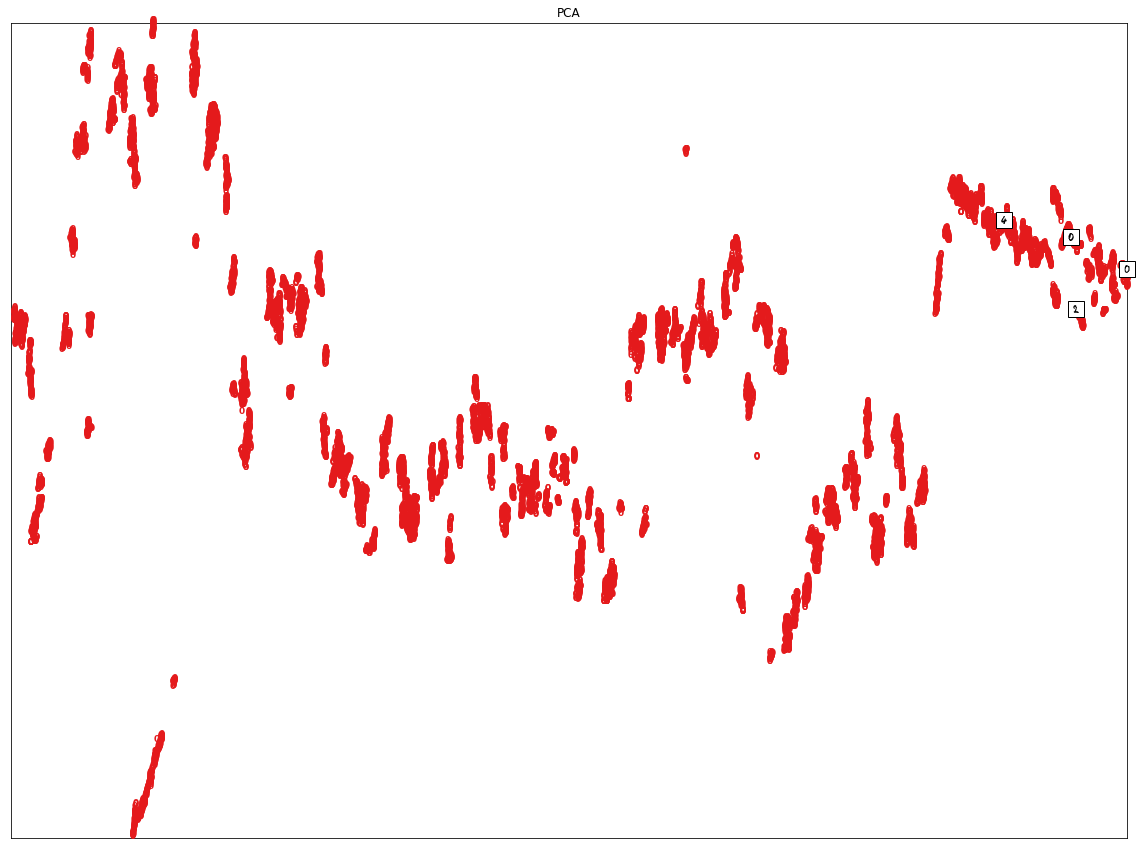

In [124]:
plt.show()

In [125]:
from time import time
t0 = time()
classifier = classifier_choice('tsne')
well_clusters = data_fit(classifier,well_data.drop(['Well','TD'],axis=1))
print(time()-t0)

327.2655189037323


In [126]:
plot_embedding(well_clusters,well_labels,'PCA')

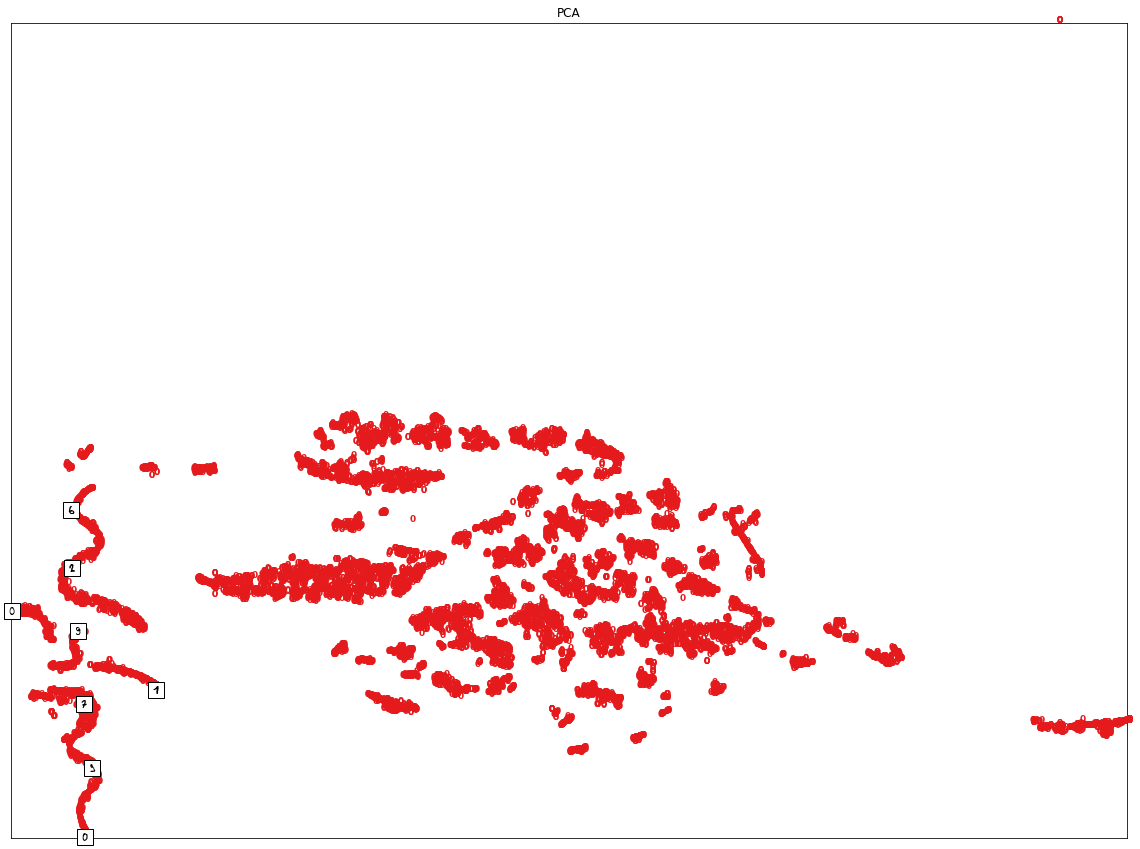

In [127]:
plt.show()

In [133]:
plot_embedding(well_clusters,well_labels,'T-SNE')

In [134]:
plt.show()

In [158]:
from time import time
t0 = time()
piper = chainer('robust','tsne')

In [159]:
well_clusters = data_fit(piper,well_data.drop(['Well','TD'],axis=1))
print(time()-t0)

1109.3879504203796


In [181]:
clean_cluster = well_clusters.copy()
clean_cluster[clean_cluster > 1000] = 0

Performing t-SNE using 1 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 1641 of 16410
 - point 3282 of 16410
 - point 4923 of 16410
 - point 6564 of 16410
 - point 8205 of 16410
 - point 9846 of 16410
 - point 11487 of 16410
 - point 13128 of 16410
 - point 14769 of 16410
 - point 16410 of 16410
Done in 7.00 seconds (sparsity = 0.007104)!
Learning embedding...
Iteration 201: error is 70.413656 (50 iterations in 15.00 seconds)
Iteration 301: error is 2.604352 (50 iterations in 15.00 seconds)
Iteration 51: error is 97.724268 (50 iterations in 22.00 seconds)
Iteration 351: error is 2.207348 (50 iterations in 15.00 seconds)
Iteration 251: error is 67.786889 (50 iterations in 16.00 seconds)
Iteration 401: error is 1.919943 (50 iterations in 16.00 seconds)
Iteration 301: error is 2.608566 (50 iterations in 17.00 seconds)
Iteration 101: error is 83.035121 (50 iterations in 19.00 seconds)
Iteration 351: error is 

348.0802700519562


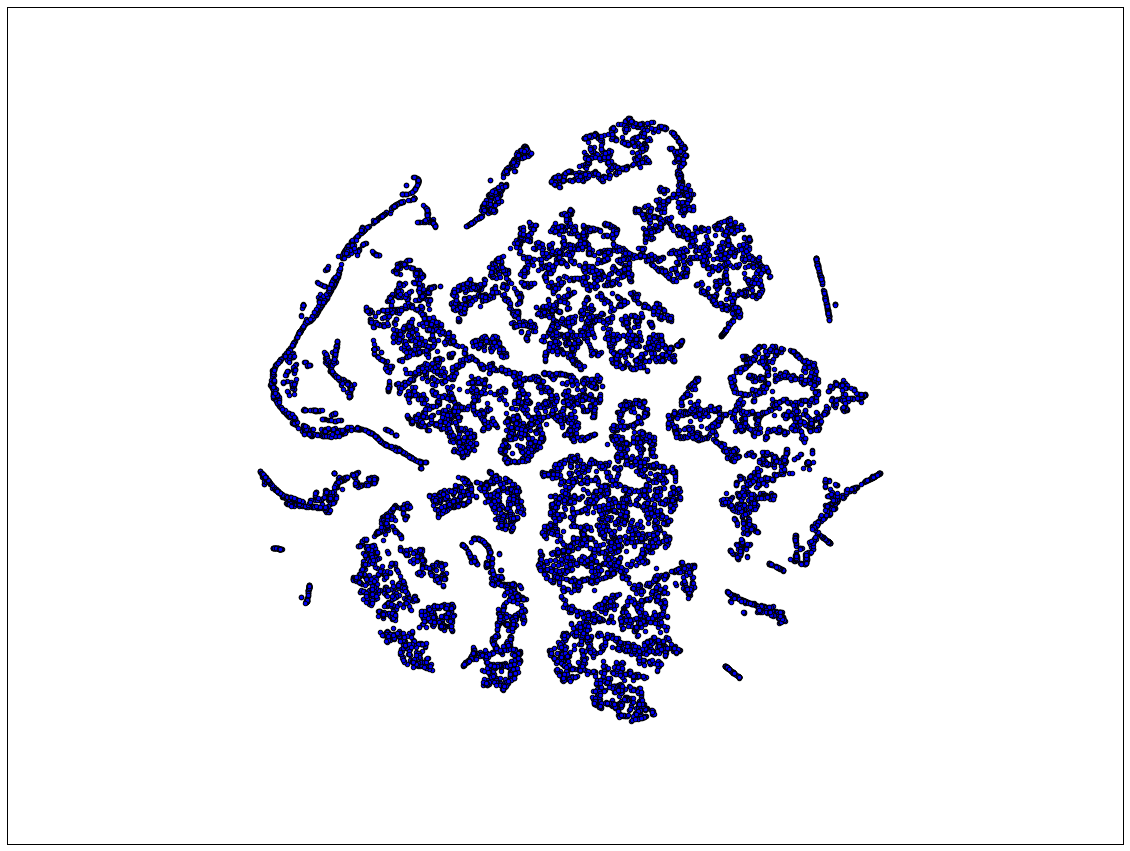

In [15]:
from time import time
t0 = time()
piper = chainer('robust','tsne')
well_clusters = data_fit(piper, well_data.drop(['Well','TD'],axis=1))
print(time()-t0)
clean_cluster = well_clusters.copy()
clean_cluster[clean_cluster > 1000] = 0
plot_embedding(clean_cluster)
plt.show()

In [18]:
well_data_out = well_data.copy()
well_data_out['x'] = clean_cluster[:, 0]
well_data_out['y'] = clean_cluster[:, 1]

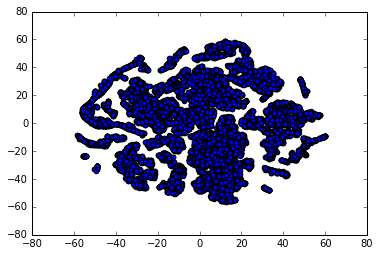

In [19]:
plt.scatter(well_data_out['x'], well_data_out['y'])

In [20]:
well_data_out.to_pickle("5_wells_p_30_no_pca.pkl")

In [25]:
well_data_out['cluster'] = np.random.randint(low=0, high=9, size=len(well_data_out))

In [29]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
print(well_data['Well'].unique())
facies_labels = ['a', 'b', 'c', 'd', 'e',
                 'f', 'g','h', 'i']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['cluster'] -1]
    
#training_data.loc[:,'cluster'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

def  make_facies_log_plotmake_fa(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='TD')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.TD.min(); zbot=logs.TD.max()
    
    cluster=np.repeat(np.expand_dims(logs['cluster'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.TD, '-g')
    ax[1].plot(logs.LITHESA9_I4, logs.TD, '-')
    ax[2].plot(logs.LITHESA9_I8I4, logs.TD, '-', color='0.5')
    ax[3].plot(logs.RDEP, logs.TD, '-', color='r')
    ax[4].plot(logs.RMED, logs.TD, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' a ', 'b', 'c', 
                                'd', ' e ', ' f ', ' g  ', 
                                ' h ', ' i ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("LITHESA9_I4")
    ax[1].set_xlim(logs.LITHESA9_I4.min(),logs.LITHESA9_I4.max())
    ax[2].set_xlabel("LITHESA9_I8I4")
    ax[2].set_xlim(logs.LITHESA9_I8I4.min(),logs.LITHESA9_I8I4.max())
    ax[3].set_xlabel("RDEP")
    ax[3].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[4].set_xlabel("RMED")
    ax[4].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[5].set_xlabel('Cluster')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well'], fontsize=14,y=0.94)
    
make_facies_log_plotmake_fa(well_data_out, facies_colors)

['16_7-11.las']


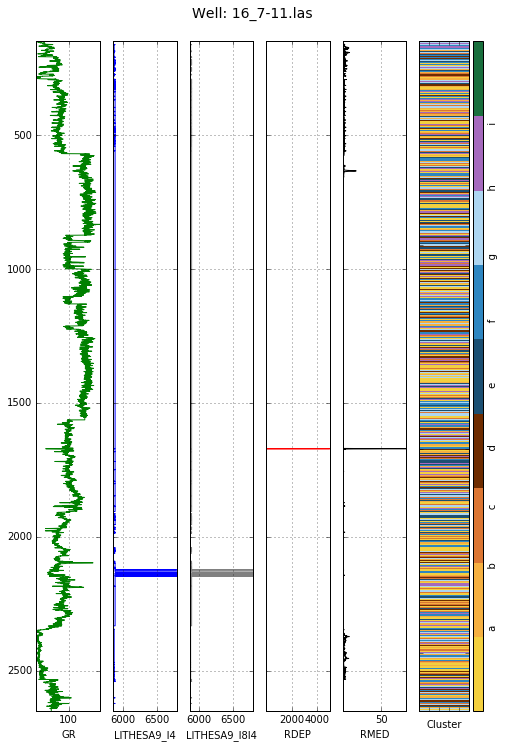

In [30]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

make_facies_log_plotmake_fa(well_data_out, facies_colors)

In [ ]:
import petropy as ptr
viewer = ptr.LogViewer(log)
viewer.show(edit_mode = True)

# overwrite log variable with updated log     #
# from LogViewer edits                        #

log = viewer.log